In [194]:
from pickle import load
import numpy as np
from sklearn.svm import SVC
import json
from sklearn.metrics import matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import matthews_corrcoef, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [195]:
mccs = {}
reports = {}
f1_scores = {}
accs = {}
y_preds = {}

### Treinamento com GAMMA='AUTO'

In [196]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'gamma_auto' not in mccs.keys():
        mccs['gamma_auto'] = []
        reports['gamma_auto'] = []
        f1_scores['gamma_auto'] = []
        y_preds['gamma_auto'] = []
        accs['gamma_auto'] = []
    mccs['gamma_auto'].append(mcc)
    reports['gamma_auto'].append(report)
    f1_scores['gamma_auto'].append(f1)
    y_preds['gamma_auto'].append(y_pred)
    accs['gamma_auto'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

In [198]:
df = pd.read_csv('SMILEsmilesD_features/sigmas_frac0.5.csv')

### Treinamento sigest Median

In [199]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma=df['median'][i-1], kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'sigest_median' not in mccs.keys():
        mccs['sigest_median'] = []
        reports['sigest_median'] = []
        f1_scores['sigest_median'] = []
        y_preds['sigest_median'] = []
        accs['sigest_median'] = []
    mccs['sigest_median'].append(mcc)
    reports['sigest_median'].append(report)
    f1_scores['sigest_median'].append(f1)
    y_preds['sigest_median'].append(y_pred)
    accs['sigest_median'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

### Treinamento sigest 0.9 quantile

In [200]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    clf = make_pipeline(StandardScaler(), SVC(gamma=df['09quantile'][i-1], kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'sigest_0.9quantile' not in mccs.keys():
        mccs['sigest_0.9quantile'] = []
        reports['sigest_0.9quantile'] = []
        f1_scores['sigest_0.9quantile'] = []
        y_preds['sigest_0.9quantile'] = []
        accs['sigest_0.9quantile'] = []
    mccs['sigest_0.9quantile'].append(mcc)
    reports['sigest_0.9quantile'].append(report)
    f1_scores['sigest_0.9quantile'].append(f1)
    y_preds['sigest_0.9quantile'].append(y_pred)
    accs['sigest_0.9quantile'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

### Treinamento sigest media dos quantis

In [201]:
for i in tqdm(range(1,101)):
    X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
    X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                        load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
    gamma_mean_sigest = (df['09quantile'][i-1] + df['01quantile'][i-1]) / 2.
    clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_mean_sigest, kernel='rbf', C=1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
    acc = accuracy_score(y_test, y_pred)
    if 'gamma_mean_sigest' not in mccs.keys():
        mccs['gamma_mean_sigest'] = []
        reports['gamma_mean_sigest'] = []
        f1_scores['gamma_mean_sigest'] = []
        y_preds['gamma_mean_sigest'] = []
        accs['gamma_mean_sigest'] = []
    mccs['gamma_mean_sigest'].append(mcc)
    reports['gamma_mean_sigest'].append(report)
    f1_scores['gamma_mean_sigest'].append(f1)
    y_preds['gamma_mean_sigest'].append(y_pred)
    accs['gamma_mean_sigest'].append(acc)

  0%|          | 0/100 [00:00<?, ?it/s]

### Treinamento gamma = 1/N

In [202]:
if False:
    for i in tqdm(range(1,101)):
        X_train, y_train = load(open(f'SMILEsmilesD_features/train_features_HOGShape_{i}.pkl', 'rb')), \
                            load(open(f'SMILEsmilesD_features/train_labels_HOGShape_{i}.pkl', 'rb'))
        X_test, y_test = load(open(f'SMILEsmilesD_features/test_features_HOGShape_{i}.pkl', 'rb')), \
                            load(open(f'SMILEsmilesD_features/test_labels_HOGShape_{i}.pkl', 'rb'))
        gamma_N = 1./(X_train.shape[0])
        clf = make_pipeline(StandardScaler(), SVC(gamma=gamma_N, kernel='rbf', C=1))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        mcc = matthews_corrcoef(y_true=y_test, y_pred=y_pred, sample_weight=None)
        report = classification_report(y_test, y_pred, target_names=np.unique(y_test), output_dict=True)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label=np.unique(y_test)[1])
        acc = accuracy_score(y_test, y_pred)
        if 'gamma_N' not in mccs.keys():
            mccs['gamma_N'] = []
            reports['gamma_N'] = []
            f1_scores['gamma_N'] = []
            y_preds['gamma_N'] = []
            accs['gamma_N'] = []
        mccs['gamma_N'].append(mcc)
        reports['gamma_N'].append(report)
        f1_scores['gamma_N'].append(f1)
        y_preds['gamma_N'].append(y_pred)
        accs['gamma_N'].append(acc)

In [203]:
for k, v in mccs.items():
    mcc_var = np.array(v).var()
    mcc_mean = np.array(v).mean()
    print(f'Mean MCC score for {k} is {mcc_mean} with variation {mcc_var}')

Mean MCC score for gamma_auto is 0.7823266028871477 with variation 9.706365505790479e-05
Mean MCC score for sigest_median is 0.777564672648178 with variation 0.00010045916862803487
Mean MCC score for sigest_0.9quantile is 0.7800677888444018 with variation 0.00010549291276391344
Mean MCC score for gamma_mean_sigest is 0.7778310434796125 with variation 0.00010231767247845908


In [220]:
mccs_pandas = pd.DataFrame()
for k, v in mccs.items():
    mcc = pd.DataFrame(np.array(v).T, columns=[k])
    mccs_pandas = mccs_pandas.append(mcc)

In [226]:
mccs_pandas.to_csv('mccs_imbalanced.csv')

In [204]:
for k, v in accs.items():
    acc_var = np.array(v).var()
    acc_mean = np.array(v).mean()
    print(f'Mean ACC score for {k} is {acc_mean} with variation {acc_var}')

Mean ACC score for gamma_auto is 0.9137113924050634 with variation 1.555484057042144e-05
Mean ACC score for sigest_median is 0.9118075949367089 with variation 1.5500746675212302e-05
Mean ACC score for sigest_0.9quantile is 0.9127822784810126 with variation 1.6553110078513083e-05
Mean ACC score for gamma_mean_sigest is 0.9119113924050634 with variation 1.5863323185386927e-05


In [231]:
len(list(accs.values())[0]), len(list(mccs.values())[0]), len(list(f1_scores.values())[0])

(100, 100, 100)

In [229]:
with open('mccs_imbalanced.json', 'w') as jsonFile:
    json.dump(mccs, jsonFile, indent=2)
with open('accs_imbalanced.json', 'w') as jsonFile:
    json.dump(accs, jsonFile, indent=2)
with open('f1scores_imbalanced.json', 'w') as jsonFile:
    json.dump(f1_scores, jsonFile, indent=2)

GAMMA gamma_auto
F1-score is 0.8396940096010507 with variation 5.6160720540942386e-05

GAMMA sigest_median
F1-score is 0.8363594343252582 with variation 5.895729688418308e-05

GAMMA sigest_0.9quantile
F1-score is 0.8382309514231697 with variation 6.13587717132972e-05

GAMMA gamma_mean_sigest
F1-score is 0.8365576031343137 with variation 5.95673306413273e-05



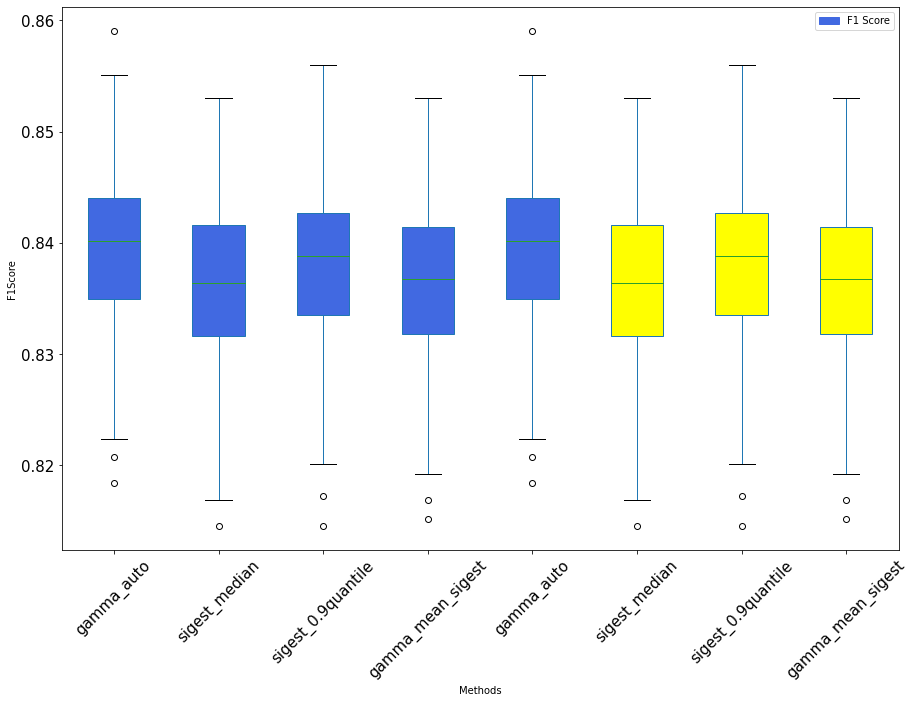

In [209]:
for k, v in f1_scores.items():
    f1_score = []
    for f1 in v:
        f1_score.append(f1)
    f1_score = np.array(f1_score)
    f1s.append([k, f1_score])
    print(f'GAMMA {k}')
    print(f'F1-score is {f1_score.mean()} with variation {f1_score.var()}')
    print('')
f1df = pd.DataFrame(np.array([x[1] for x in f1s]).T, columns=[x[0] for x in f1s])

plot = f1df.boxplot(figsize=(15,10), grid=False, rot=45, return_type='dict', patch_artist = True,fontsize=15)
colors = ['royalblue', 'yellow']
i = 0
for patch in plot['boxes']:
    patch.set(facecolor = colors[0] if i<5 else colors[1])
    i-=-1
plt.xlabel('Methods')
plt.ylabel('F1Score')
plt.suptitle('')
blue_patch = mpatches.Patch(color='royalblue', label='F1 Score')
plt.legend(handles=[blue_patch])
plt.show()

GAMMA gamma_auto
F1-score is 0.8396940096010507 with variation 5.6160720540942386e-05

GAMMA sigest_median
F1-score is 0.8363594343252582 with variation 5.895729688418308e-05

GAMMA sigest_0.9quantile
F1-score is 0.8382309514231697 with variation 6.13587717132972e-05

GAMMA gamma_mean_sigest
F1-score is 0.8365576031343137 with variation 5.95673306413273e-05



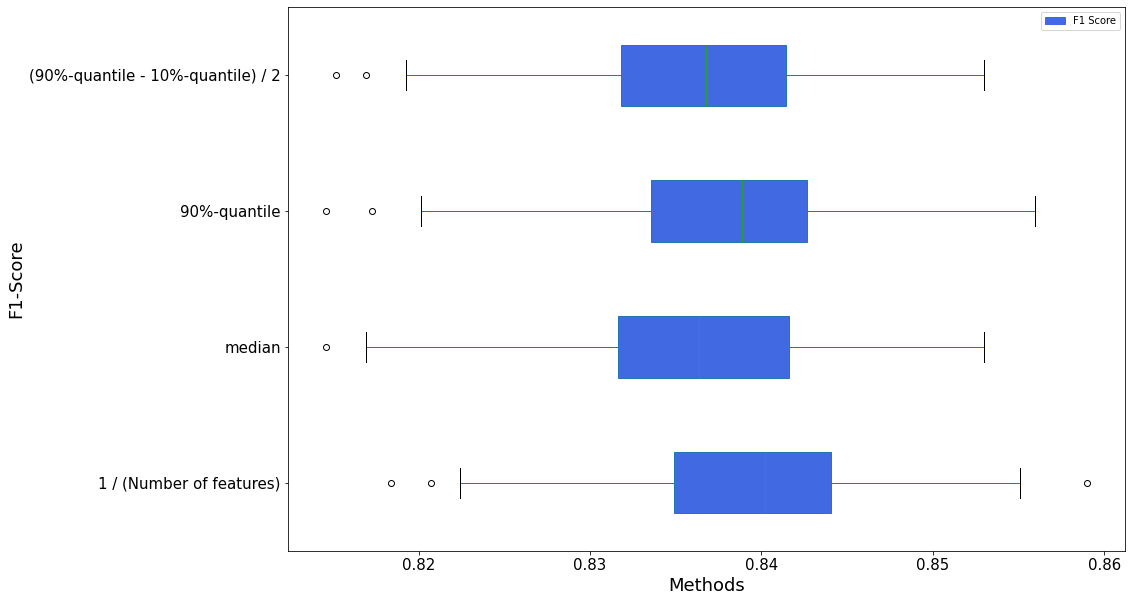

In [210]:
f1s = []
for k, v in f1_scores.items():
    f1_score = []
    for f1 in v:
        f1_score.append(f1)
    f1_score = np.array(f1_score)
    f1s.append([k, f1_score])
    print(f'GAMMA {k}')
    print(f'F1-score is {f1_score.mean()} with variation {f1_score.var()}')
    print('')
f1df = pd.DataFrame(np.array([x[1] for x in f1s]).T, columns=[x[0] for x in f1s])

f1df = f1df.rename(columns={'gamma_N_smile': '1 / (Number of samples)',
                              'gamma_N_notsmile': '1 / (Number of samples)',
                              'gamma_mean_sigest': '(90%-quantile - 10%-quantile) / 2',
                              'gamma_mean_sigest_notsmile': '(90%-quantile - 10%-quantile) / 2',
                              'sigest_0.9quantile': '90%-quantile',
                              'sigest_0.9quantile_notsmile': '90%-quantile',
                              'sigest_median': 'median',
                              'sigest_median_notsmile': 'median',
                              'gamma_auto': '1 / (Number of features)',
                              'gamma_auto_notsmile': '1 / (Number of features)'})

plot = f1df.boxplot(figsize=(15,10), grid=False, rot=0, return_type='dict', patch_artist = True,fontsize=15, vert=False)
colors = ['royalblue', 'yellow']
i = 0
for patch in plot['boxes']:
    patch.set(facecolor = colors[0] if i<5 else colors[1])
    i-=-1
plt.xlabel('Methods', fontsize=18)
plt.ylabel('F1-Score', fontsize=18)
plt.suptitle('')
blue_patch = mpatches.Patch(color='royalblue', label='F1 Score')
plt.legend(handles=[blue_patch])
plt.show()